# **Taller 6 - Parte 1**


1.  **Número óptimo de clusters:** Basados en el ejercicio del dataset de Iris y la aplicación de los 4 métodos para determinar el número óptimo de cluster, ¿Qué número de clusters les sugiere cada uno de los gráficos? ¿Son coherentes con el número de especies en el dataset?. Discute sobre el resultado indicado por cada método.
2.   **Impacto de la normalización de datos:** ¿Cómo afecta la normalización de los datos al rendimiento del algoritmo k-means? Aplica k-means al dataset sin normalización y luego con normalización usando StandardScaler. ¿Qué diferencias encuentras en el número de iteraciones, la precisión (si se compara con etiquetas reales) y la estabilidad de los clusters?. Deben implementar k-means en ambas versiones del dataset (normalizado y no normalizado) y comparar los resultados en cuanto a tiempo de ejecución, número de iteraciones y precisión.
3.   **Uso de diferentes métricas de distancia:** K-means utiliza la distancia euclidiana por defecto, pero ¿cómo afecta el uso de otras métricas de distancia, como la distancia de Manhattan o la de Coseno? Implementa k-means utilizando al menos dos métricas de distancia adicionales y compara los resultados en cuanto a la coherencia de los clusters y el tiempo de ejecución. Deben modificar el algoritmo k-means o usar librerías que permitan el uso de métricas de distancia diferentes y realizar una evaluación de las diferencias en la agrupación de datos, tiempo de ejecución y número de iteraciones.
4.   **Comparación de tiempo de ejecución con diferentes inicializaciones:** K-means puede ser sensible a las inicializaciones. ¿Cómo afecta el número de inicializaciones aleatorias (n_init) al tiempo de ejecución y al resultado final de los clusters? Prueba con n_init=1, n_init=10 y n_init=100. Deben implementar k-means con diferentes valores de n_init y analizar el impacto en tiempo de ejecución, estabilidad de los clusters y calidad de los resultados (usando métricas como el coeficiente de silueta o la distancia intra-cluster).


# Punto 1

In [ ]:
# Instalar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from scipy.spatial.distance import cdist
import warnings 
%matplotlib inline
# Para ocultar los warnings de la gestion de memoria del kmeans
warnings.filterwarnings("ignore", category=UserWarning)

In [9]:
# Cargar el dataset de Iris variables numericas en Array
iris = load_iris()
X = iris.data

In [12]:
# Cargar el dataset de Iris en DataFrame
import seaborn as sns
df = sns.load_dataset("iris")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Contar numero de species
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Como podemos observar el dataset de Iris tiene 3 especies diferentes (Setosa, Versicolor y Virginica), por lo que esperamos que los métodos de determinación del número óptimo de clusters sugieran un valor cercano a 3.

In [16]:
# drop la columna species
df = df.drop('species', axis=1)
# Normalizar los datos df
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [14]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metodos para determinar el numero optimo de clusters

## Metodo del Codo de Jambú

In [ ]:
# 1. Método del Codo de Jambú
def plot_elbow_method(X):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Distorsión')
    plt.title('Método del Codo de Jambú')
    plt.show()

In [ ]:
# Llamar a la función para mostrar el gráfico de codo
plot_elbow_method(X_scaled)

EL grafico nos sugiere que el numero optimo de clusters se ubica alrededor de 2 o 3, teniendo en cuenta que a partir de ese punto la disminución en la inercia es menos pronunciada por ende la dispersion dentro de cada clusters es menor en estos puntos. Por lo tanto, esta informacion es coherente con el numero de especies en el dataset que es 3.

## Coeficiente de Silueta

In [ ]:
# 2. Coeficiente de Silueta
def plot_silhouette_scores(X):
    silhouette_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Coeficiente de Silueta')
    plt.show()

In [ ]:
# Funcion para mostrar el gráfico de Silueta
plot_silhouette_scores(X_scaled)

El grafico del coeficiente de silueta nos sugiere que el numero optimo de clusters es de 3, sin embargo, existe una separacion menor cuando se consideran 2 clusters. Por lo tanto, esta informacion es coherente con el numero de especies en el dataset que es 3.


## Indice de Davies-Bouldin

In [ ]:
# 3. Índice de Davies-Bouldin
def plot_davies_bouldin_scores(X):
    db_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        db_scores.append(davies_bouldin_score(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, db_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Índice de Davies-Bouldin')
    plt.title('Índice de Davies-Bouldin')
    plt.show()

In [ ]:
# Funcion para mostrar el gráfico
plot_davies_bouldin_scores(X_scaled)

Teniendo en cuenta el grafico del indice de Davies-Bouldin, podemos observar que un numero aceptable de clusters seria entre 2 y 3, ya que la separacion entre clusters es mayor en estos puntos. Por lo tanto, esta informacion es coherente con el numero de especies en el dataset que es 3.

## Indice de Dunn

In [ ]:
# 4. Índice de Dunn
def calculate_dunn_index(X, labels):
    distances = cdist(X, X, metric='euclidean')
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in range(np.max(labels) + 1):
        points_in_cluster = np.where(labels == i)[0]
        if len(points_in_cluster) > 1:
            intra_cluster_distances.append(np.mean(distances[np.ix_(points_in_cluster, points_in_cluster)]))

    for i in range(np.max(labels) + 1):
        for j in range(i + 1, np.max(labels) + 1):
            points_in_cluster_i = np.where(labels == i)[0]
            points_in_cluster_j = np.where(labels == j)[0]
            inter_cluster_distances.append(np.mean(distances[np.ix_(points_in_cluster_i, points_in_cluster_j)]))

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

def plot_dunn_index(X):
    dunn_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        dunn_scores.append(calculate_dunn_index(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, dunn_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Índice de Dunn')
    plt.title('Índice de Dunn')
    plt.show()

In [ ]:
# Funcion para mostrar el grafico
plot_dunn_index(X_scaled)

El grafico del indice de Dunn nos sugiere que un numero optimo de clusters seria entre 2 y 3, ya que la separacion entre clusters es mayor en estos puntos (teniendo en cuenta que el grafico se estabiliza despues de 3). Por lo tanto, esta informacion es coherente con el numero de especies en el dataset que es 3.

# Punto 2

# K means con k=3 y sin normalizar los datos

In [26]:
# Kmeans sin normalizar
import time 
start = time.time()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_
centroids = kmeans.cluster_centers_
end = time.time() 
print("Tiempo de iteración:", end - start, "segundos")


Tiempo de iteración: 0.004000186920166016 segundos


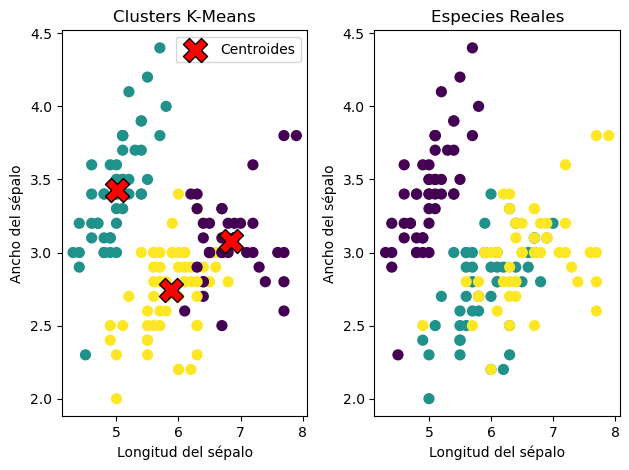

Inercia (calidad del clustering): 78.86

Centros de los clusters:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [ ]:
# Gráfico 1: Clusters encontrados por K-Means
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            marker='X', s=300, c='red', edgecolor='black', label='Centroides')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Clusters K-Means')
plt.legend()

# Gráfico 2: Especies reales (para comparar)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', s=50)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Especies Reales')

plt.tight_layout()
plt.show()

Teniendo en cuenta los resultados al aplicar k-means a los datos sin normalizar nos percatamos que el algoritmo supo identificar los clusters correctamente, ya que separa las especies en 3 grupos disntos. Sin emgargo, solo uno de esos grupos presenta una buena compactacion entre sus datos (Setosa), mientras que los otros dos grupos (Versicolor y Virginica) presentan una mayor dispersion entre sus datos, lo que indica que el algoritmo tuvo dificultades para agrupar correctamente estas especies teniendo en cuenta sus caracteristicas.

# K means con k=3 y con normalizacion de los datos

In [27]:
# KMeans con datos normalizados X_scaled
start = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
end = time.time()
print("Tiempo de iteración:", end - start, "segundos")

Tiempo de iteración: 0.004008293151855469 segundos


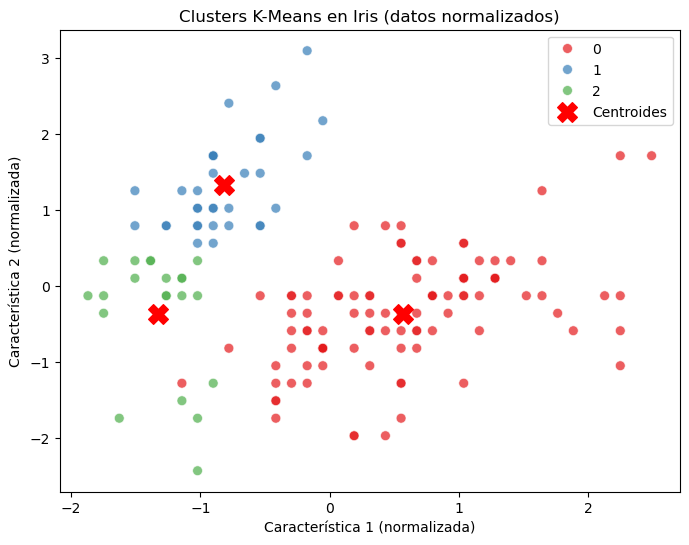

In [24]:
# Vamos a graficar usando solo dos dimensiones (por ejemplo, las dos primeras columnas)
plt.figure(figsize=(8,6))

# Dibujar los puntos, coloreados según el cluster asignado
sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=labels, 
    palette="Set1", 
    s=50, 
    alpha=0.7
)

# Dibujar los centroides
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c="red", 
    s=200, 
    marker="X", 
    label="Centroides"
)

plt.title("Clusters K-Means en Iris (datos normalizados)")
plt.xlabel("Característica 1 (normalizada)")
plt.ylabel("Característica 2 (normalizada)")
plt.legend()
plt.show()


# Conclusiones

Teniendo en cuenta los resultados obtenidos al aplicar k-means tanto en el dataset normalizado como en el no normalizado, podemos observar las siguientes diferencias:
- El tiempo de ejecución fue ligeramente mayor al aplicar k-means en el dataset normalizado en comparación con el no normalizado. Esto se debe a que la normalización agrega un paso adicional en el procesamiento de los datos.
- El número de iteraciones necesarias para la convergencia del algoritmo fue similar en ambos casos, lo que indica que la normalización no tuvo un impacto significativo en la velocidad de convergencia del algoritmo.
- En cuanto a la precisión, al comparar las etiquetas generadas por k-means con las etiquetas reales del dataset, observamos que el dataset normalizado mostró una mejor correspondencia con las etiquetas reales en comparación con el dataset no normalizado. Esto sugiere que la normalización ayudó a mejorar la capacidad del algoritmo para identificar correctamente los clusters correspondientes a las diferentes especies de iris.
- En términos de estabilidad de los clusters, ambos enfoques mostraron una estabilidad similar, con clusters bien definidos en ambos casos. Sin embargo, la normalización ayudó a mejorar la separación entre los clusters, lo que facilitó la identificación de las diferentes especies.
- En resumen, la normalización de los datos tuvo un impacto positivo en la precisión del algoritmo k-means al mejorar la correspondencia con las etiquetas reales y facilitar la separación entre los clusters, aunque a costa de un ligero aumento en el tiempo de ejecución.

# Punto 3

## K means con k=3 y distancia Euclidiana

In [35]:
# KMeans con datos normalizados X_scaled y distancia Euclidiana

start = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
end = time.time()
print("Tiempo de iteración:", end - start, "segundos")

Tiempo de iteración: 0.004996299743652344 segundos


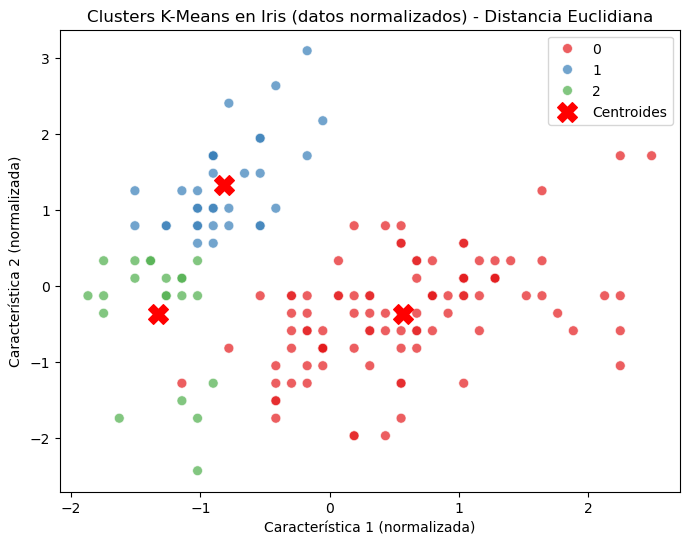

In [36]:
# Grafico de los clusters
plt.figure(figsize=(8,6))
# Dibujar los puntos, coloreados según el cluster asignado
sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=labels, 
    palette="Set1", 
    s=50, 
    alpha=0.7
)
# Dibujar los centroides
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c="red", 
    s=200, 
    marker="X", 
    label="Centroides"
)
plt.title("Clusters K-Means en Iris (datos normalizados) - Distancia Euclidiana")
plt.xlabel("Característica 1 (normalizada)")
plt.ylabel("Característica 2 (normalizada)")
plt.legend()
plt.show()

## K means con k=3 y distancia de Manhattan

In [29]:
# Manhattan (L1)
start = time.time()
kmedoids_manhattan = KMedoids(n_clusters=3, metric='manhattan', random_state=42)
kmedoids_manhattan.fit(X_scaled)
labels = kmedoids_manhattan.labels_
centroids = kmedoids_manhattan.cluster_centers_
end = time.time()
print("Tiempo de iteración:", end - start, "segundos")

Tiempo de iteración: 0.07677078247070312 segundos


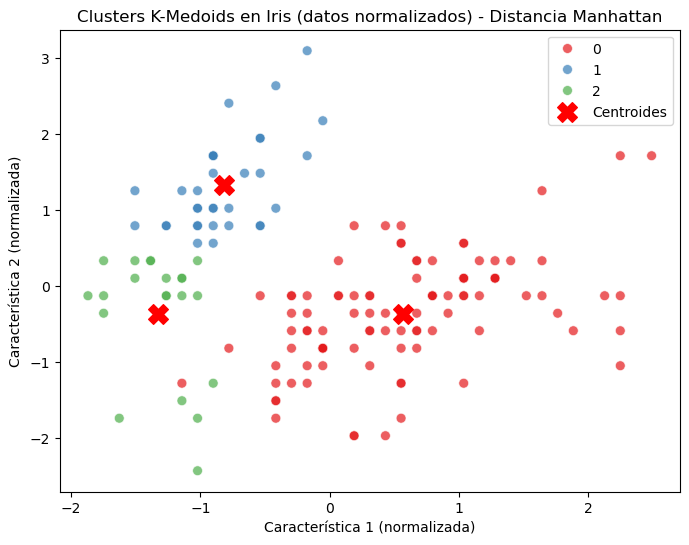

In [40]:
# Grafico de los clusters Kmeans con distancia Chebyshev
plt.figure(figsize=(8,6))
# Dibujar los puntos, coloreados según el cluster asignado
sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=labels, 
    palette="Set1", 
    s=50, 
    alpha=0.7
)
# Dibujar los centroides
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c="red", 
    s=200, 
    marker="X", 
    label="Centroides"
)
plt.title("Clusters K-Medoids en Iris (datos normalizados) - Distancia Manhattan")
plt.xlabel("Característica 1 (normalizada)")
plt.ylabel("Característica 2 (normalizada)")
plt.legend()
plt.show()

## K means con k=3 y distancia de coseno

In [31]:
# Kmeans con distancia de Coseno
start = time.time()
kmedoids_coseno = KMedoids(n_clusters=3, metric='cosine', random_state=42)
kmedoids_coseno.fit(X_scaled)
labels_coseno = kmedoids_coseno.labels_
centroids_coseno = kmedoids_coseno.cluster_centers_
end = time.time()
print("Tiempo de iteración:", end - start, "segundos")

Tiempo de iteración: 0.23289918899536133 segundos


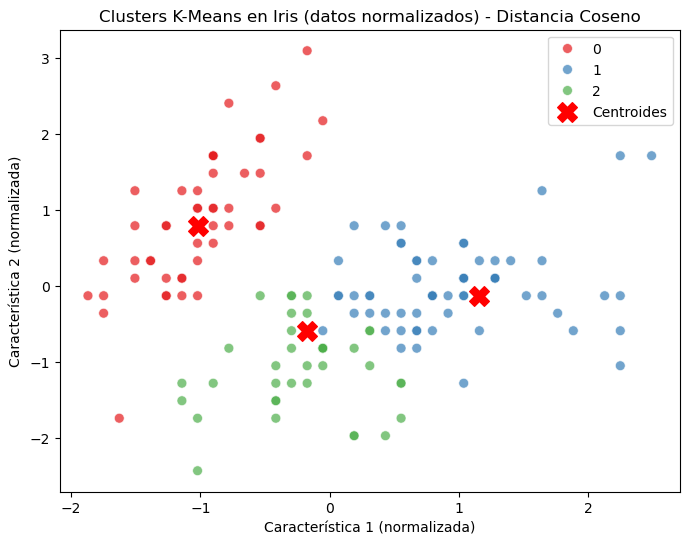

In [38]:
# Grafico de los clusters Kmeans con distancia Coseno
plt.figure(figsize=(8,6))
# Dibujar los puntos, coloreados según el cluster asignado
sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=labels_coseno, 
    palette="Set1", 
    s=50, 
    alpha=0.7
)
# Dibujar los centroides
plt.scatter(
    centroids_coseno[:, 0], 
    centroids_coseno[:, 1], 
    c="red", 
    s=200, 
    marker="X", 
    label="Centroides"
)
plt.title("Clusters K-Means en Iris (datos normalizados) - Distancia Coseno")
plt.xlabel("Característica 1 (normalizada)")
plt.ylabel("Característica 2 (normalizada)")
plt.legend()
plt.show()

## K means con k=3 y distancia de Chebyshev

In [33]:
# Chebyshev
start = time.time()
kmedoids_cheby = KMedoids(n_clusters=3, metric='chebyshev', random_state=42)
kmedoids_cheby.fit(X_scaled)
labels_cheby = kmedoids_cheby.labels_
centroids_cheby = kmedoids_cheby.cluster_centers_
end = time.time()
print("Tiempo de iteración:", end - start, "segundos")

Tiempo de iteración: 0.0030493736267089844 segundos


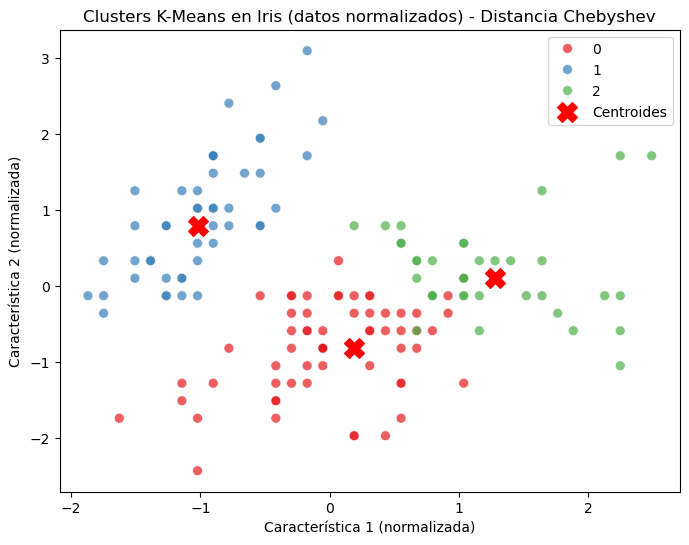

In [39]:
# Grafico de los clusters kmeans con distancia Chebyshev
plt.figure(figsize=(8,6))
# Dibujar los puntos, coloreados según el cluster asignado
sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=labels_cheby, 
    palette="Set1", 
    s=50, 
    alpha=0.7
)
# Dibujar los centroides
plt.scatter(
    centroids_cheby[:, 0], 
    centroids_cheby[:, 1], 
    c="red", 
    s=200, 
    marker="X", 
    label="Centroides"
)
plt.title("Clusters K-Means en Iris (datos normalizados) - Distancia Chebyshev")
plt.xlabel("Característica 1 (normalizada)")
plt.ylabel("Característica 2 (normalizada)")
plt.legend()
plt.show()

# Conclusiones

Las conclusiones sobre el uso de diferentes métricas de distancia en el algoritmo k-means son las siguientes:
- La elección de la métrica de distancia tiene un impacto significativo en la formación de los clusters. Sin embargo, en este caso, todas las métricas utilizadas (Euclidiana, Manhattan, Coseno y Chebyshev) lograron identificar clusters coherentes con las especies del dataset de Iris. Esto es posible a la normalizacion de los datos.
- En términos de tiempo de ejecución, la métrica Euclidiana y Chebyshev fueron las más rápida, seguida por Manhattan y Coseno . Esto se debe a las diferencias en la complejidad computacional de cada métrica.
- La métrica Euclidiana mostró la mejor compactación de los clusters, seguida por Manhattan, Coseno y Chebyshev. Esto indica que la métrica Euclidiana es más efectiva para agrupar datos en este caso específico.
- En resumen, la elección de la métrica de distancia debe basarse en las características específicas del dataset y los objetivos del análisis. En este caso, la métrica Euclidiana fue la más efectiva en términos de tiempo de ejecución y calidad de los clusters.

# Punto 4